In [11]:
from IPython.display import clear_output
import SALib
from SALib.sample import saltelli
from mesa.batchrunner import BatchRunner
from SALib.analyze import sobol
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
from model import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from pprint import pprint
import time
import copy
%matplotlib inline

In [20]:
problem = {
    'num_vars': 6,
    'names': [
     'max_eff', 
     'eutax',
     'neighbor_influence',
     'tax_influence',
     'member_trade_multiplier',
     'tax_distribution'],
    'bounds': [[0, 2], [0.1, 0.6], [0, 0.2], [0, 0.2], [0.9, 2], [0.8, 1.2]]
}

#international_trade, max_eff, eutax, neighbor_influence,
#tax_influence, member_trade_multiplier, randomness, eu_strategy):
# Set the repetitions, the amount of steps, and the amount of distinct values per variable
replicates = 1
max_steps = 5
distinct_samples = 20

# Set the outputs

# We get all our samples here
param_values = saltelli.sample(problem, distinct_samples, calc_second_order= False)
# READ NOTE BELOW CODE

count = 0
samples = pd.DataFrame(data=param_values,
                       columns=[ 'max_eff', 'eutax','neighbor_influence',
                                'tax_influence','member_trade_multiplier','tax_distribution'])

samples.to_csv('out.csv')

In [21]:
samples

,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,tax_distribution
0,0.439453,0.148340,0.103711,0.135352,1.208301,1.162891
1,0.091797,0.148340,0.103711,0.135352,1.208301,1.162891
2,0.439453,0.549707,0.103711,0.135352,1.208301,1.162891
3,0.439453,0.148340,0.100195,0.135352,1.208301,1.162891
4,0.439453,0.148340,0.103711,0.013867,1.208301,1.162891
...,...,...,...,...,...,...
155,0.751953,0.413965,0.143945,0.154102,1.242676,0.925391
156,0.751953,0.413965,0.047461,0.095117,1.242676,0.925391
157,0.751953,0.413965,0.047461,0.154102,1.234082,0.925391
158,0.751953,0.413965,0.047461,0.154102,1.242676,0.964453


In [30]:
data

,international_trade,max_eff,eutax,neighbor_influence,tax_influence,member_trade_multiplier,randomness,tax_distribution,member_count,other_count,average_cooperativeness,other_wealth,total_wealth,member_wealth,other_eff,total_eff,member_eff,G
0,0.219727,1.933594,10.371094,0.135352,0.056055,18.246582,0.045898,1.899414,139.100000,180.900000,-0.135510,4823705437323609249939456.000000,2681699641711656461112705024.000000,6956892345813780016498999296.000000,1.900979,1.898299,1.895076,0.005895
1,0.500977,1.933594,10.371094,0.135352,0.056055,18.246582,0.045898,1.899414,100.566667,219.433333,-0.369342,9638001069003964.000000,1930329921634008503230136320.000000,8574454146184832214548611072.000000,1.868157,1.883877,1.929822,0.005895
2,0.219727,1.386719,10.371094,0.135352,0.056055,18.246582,0.045898,1.899414,117.766667,202.233333,-0.257911,861850.989016,2589719231900983200332120064.000000,8045642932656565730962046976.000000,1.407240,1.411631,1.419999,0.005897
3,0.219727,1.933594,1.699219,0.135352,0.056055,18.246582,0.045898,1.899414,127.233333,192.766667,-0.211105,1998210196.898018,15349738320.476610,42864598211.038231,1.949828,1.928448,1.899032,0.005630
4,0.219727,1.933594,10.371094,0.050977,0.056055,18.246582,0.045898,1.899414,74.433333,245.566667,-0.522240,212.140614,538901669783524452843126784.000000,8576453228784623912080113664.000000,1.930831,1.934170,1.978288,0.005892
5,0.219727,1.933594,10.371094,0.135352,0.032227,18.246582,0.045898,1.899414,103.633333,216.366667,-0.352547,245365840.778547,2058720668060585997495173120.000000,8757756844405977945510772736.000000,1.966712,1.942001,1.887225,0.005896
6,0.219727,1.933594,10.371094,0.135352,0.056055,8.353613,0.045898,1.899414,107.766667,212.233333,-0.319989,1120956775.815742,1300507934196989009204346880.000000,4474812575590728484022910976.000000,1.961542,1.954853,1.941086,0.005820
7,0.219727,1.933594,10.371094,0.135352,0.056055,18.246582,0.143555,1.899414,72.166667,247.833333,-0.556107,862044750896093477828820992.000000,926652357210375161252937728.000000,1302372070669484692586102784.000000,1.959012,1.960855,1.976755,0.005936
8,0.219727,1.933594,10.371094,0.135352,0.056055,18.246582,0.045898,1.370117,103.966667,216.033333,-0.348160,15826401966257.470703,747187030580485376.000000,3017763246380681728.000000,2.032478,1.987174,1.895996,0.005835
9,0.219727,1.386719,1.699219,0.050977,0.032227,8.353613,0.143555,1.370117,148.266667,171.733333,-0.063774,3284.601647,82608.706429,197298.354047,1.396648,1.392167,1.388344,0.004863


Parameter S1 S1_conf ST ST_conf
international_trade -19.482011 0.000000 18.033164 0.000000
max_eff 10.233881 0.000000 4.976054 0.000000
eutax -30.934638 0.000000 45.466805 0.000000
neighbor_influence 5.484356 0.000000 1.429077 0.000000
tax_influence -21.238439 0.000000 21.431351 0.000000
member_trade_multiplier -17.456742 0.000000 14.478740 0.000000
randomness -24.356995 0.000000 28.187189 0.000000
tax_distribution -30.486569 0.000000 44.159229 0.000000

Parameter_1 Parameter_2 S2 S2_conf
international_trade max_eff -38.009717 0.000000
international_trade eutax 48.861349 0.000000
international_trade neighbor_influence -27.987587 0.000000
international_trade tax_influence 28.401076 0.000000
international_trade member_trade_multiplier 20.421192 0.000000
international_trade randomness 34.981645 0.000000
international_trade tax_distribution 47.915865 0.000000
max_eff eutax -3.309937 0.000000
max_eff neighbor_influence -21.421227 0.000000
max_eff tax_influence -8.131890 0.000000
max_eff mem

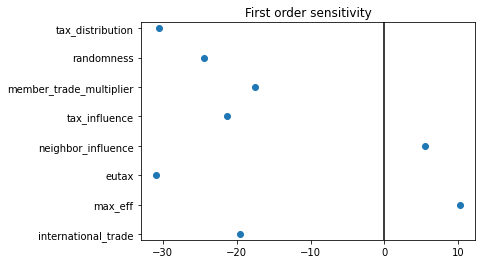

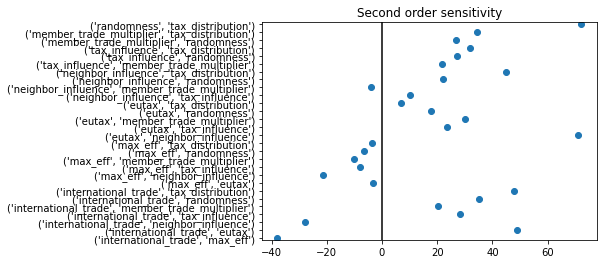

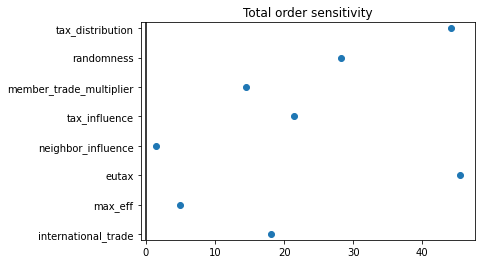

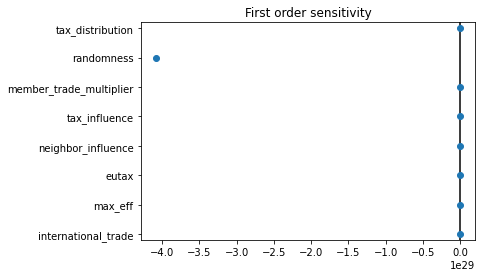

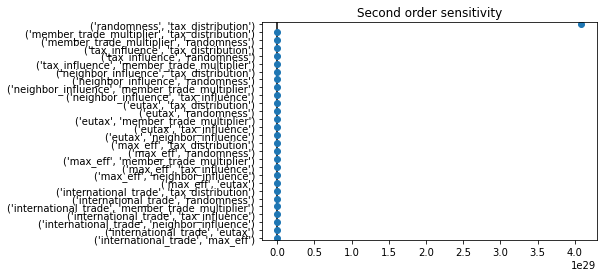

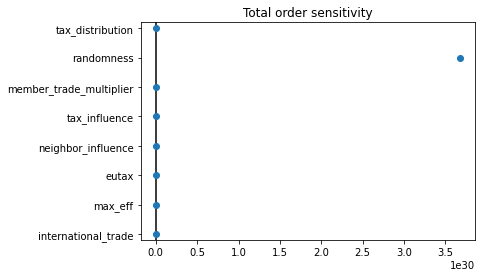

In [26]:
Si_sheep = sobol.analyze(problem, data['average_cooperativeness'].values, print_to_console=True)
def plot_index(s, params, i, title=''):
    """
    Creates a plot for Sobol sensitivity analysis that shows the contributions
    of each parameter to the global sensitivity.

    Args:
        s (dict): dictionary {'S#': dict, 'S#_conf': dict} of dicts that hold
            the values for a set of parameters
        params (list): the parameters taken from s
        i (str): string that indicates what order the sensitivity is.
        title (str): title for the plot
    """

    if i == '2':
        p = len(params)
        params = list(combinations(params, 2))
        indices = s['S' + i].reshape((p ** 2))
        indices = indices[~np.isnan(indices)]
        errors = s['S' + i + '_conf'].reshape((p ** 2))
        errors = errors[~np.isnan(errors)]
    else:
        indices = s['S' + i]
        errors = s['S' + i + '_conf']
        plt.figure()

    l = len(indices)

    plt.title(title)
    plt.ylim([-0.2, len(indices) - 1 + 0.2])
    plt.yticks(range(l), params)
    plt.errorbar(indices, range(l), xerr=errors, linestyle='None', marker='o')
    plt.axvline(0, c='k')

for Si in (Si_sheep, Si_wolves):
    # First order
    plot_index(Si, problem['names'], '1', 'First order sensitivity')
    plt.show()

    # Second order
    plot_index(Si, problem['names'], '2', 'Second order sensitivity')
    plt.show()

    # Total order
    plot_index(Si, problem['names'], 'T', 'Total order sensitivity')
    plt.show()